In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=15000, n_features=2, n_informative=2, n_redundant=0,
                          n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          weights=[0.95, 0.05], class_sep=0.8, random_state=0)

In [5]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['target'] = y
df.head()

,x1,x2,target
0,-2.473300,0.569620,0
1,1.647105,0.651006,0
2,-1.380968,1.003418,0
3,-2.592531,0.588387,0
4,-1.507043,0.647997,0


In [7]:
df['target'].value_counts()

0    14183
1      817
Name: target, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15000 non-null  float64
 1   x2      15000 non-null  float64
 2   target  15000 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 293.1 KB


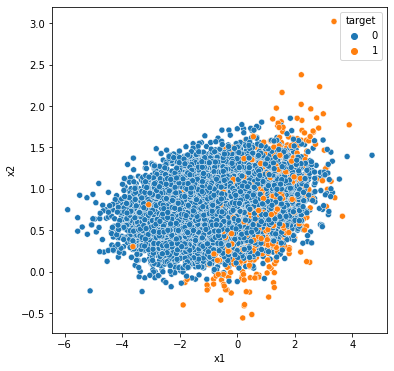

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D

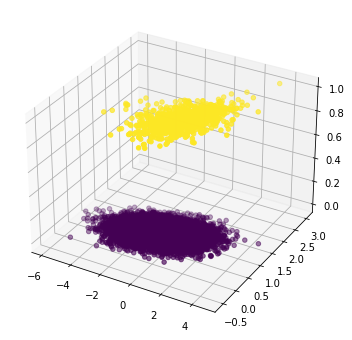

In [11]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['target'], c=df['target'])
plt.show()

## dùng ClusterCentroids

In [13]:
from imblearn.under_sampling import ClusterCentroids

In [14]:
cc = ClusterCentroids(random_state=0)

In [15]:
X_resample, y_resample = cc.fit_resample(X, y)

In [17]:
df_new = pd.DataFrame(X_resample, columns=['x1', 'x2'])
df_new['target'] = y_resample
df_new.head()

,x1,x2,target
0,-1.215478,0.787529,0
1,1.035256,1.081582,0
2,-2.899642,0.822268,0
3,-0.172765,0.639283,0
4,-1.920339,0.413567,0


In [18]:
df_new['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

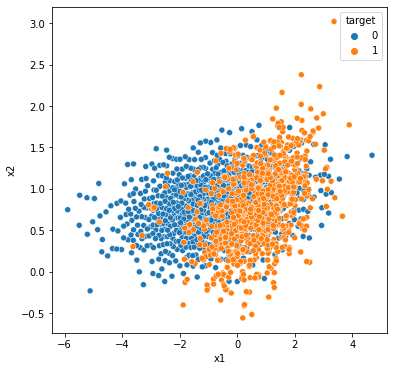

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new, x='x1', y='x2', hue='target')
plt.show()

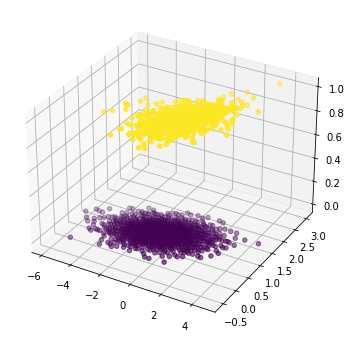

In [21]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new['x1'], df_new['x2'], df_new['target'], c=df_new['target'])
plt.show()

## dùng RandomUnderSampler

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
rs = RandomUnderSampler()
# rs = RandomUnderSampler(ratio={1:817, 0:900})

In [24]:
X_resample2, y_resample2 = rs.fit_resample(X, y)

In [25]:
df_new2 = pd.DataFrame(X_resample2, columns=['x1', 'x2'])
df_new2['target'] = y_resample2
df_new2.head()

,x1,x2,target
0,-1.181318,0.535819,0
1,-0.393718,0.266784,0
2,1.169471,1.035011,0
3,-2.589388,0.000558,0
4,-2.174515,1.029530,0


In [27]:
df_new2['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

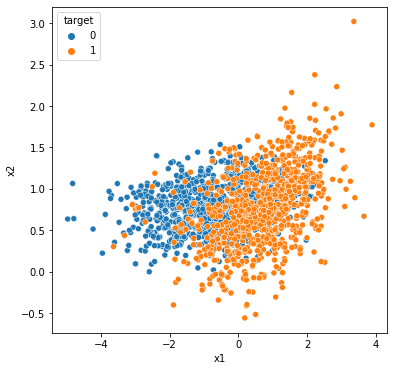

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new2, x='x1', y='x2', hue='target')
plt.show()

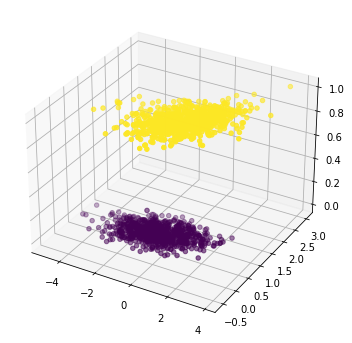

In [29]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new2['x1'], df_new2['x2'], df_new2['target'], c=df_new2['target'])
plt.show()

## dùng resample

In [31]:
from sklearn.utils import resample

In [32]:
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]

In [33]:
df_0.shape, df_1.shape

((14183, 3), (817, 3))

In [34]:
df_0_resample = resample(df_0, replace=False, n_samples=df_1.shape[0], random_state=0)

In [35]:
df_0_resample.shape

(817, 3)

In [36]:
df_new3 = pd.concat([df_0_resample, df_1])

In [37]:
df_new3['target'].value_counts()

1    817
0    817
Name: target, dtype: int64

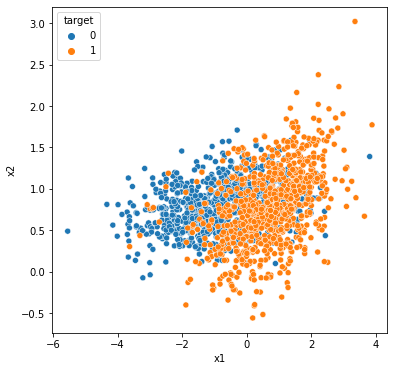

In [38]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_new3, x='x1', y='x2', hue='target')
plt.show()

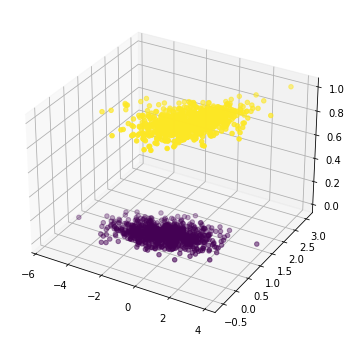

In [39]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_new3['x1'], df_new3['x2'], df_new3['target'], c=df_new3['target'])
plt.show()